In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import matplotlib.pyplot as plt
from statsmodels.multivariate.factor import Factor
from sklearn.cluster import KMeans
import ydata_profiling
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

In [17]:
df = pd.read_csv('C:/Users/User/Downloads/playground-series-s3e22/train.csv')
data = df.copy()
data

id surgery    age  hospital_number  rectal_temp  pulse  \
0        0     yes  adult           530001         38.1  132.0   
1        1     yes  adult           533836         37.5   88.0   
2        2     yes  adult           529812         38.3  120.0   
3        3     yes  adult          5262541         37.1   72.0   
4        4      no  adult          5299629         38.0   52.0   
...    ...     ...    ...              ...          ...    ...   
1230  1230     yes  adult           535246         38.5  129.0   
1231  1231     yes  adult           528570         37.5   60.0   
1232  1232     yes  young           529685         37.5   84.0   
1233  1233     yes  adult           534784         38.1   70.0   
1234  1234     yes  adult           528548         38.1   54.0   

      respiratory_rate temp_of_extremities peripheral_pulse mucous_membrane  \
0                 24.0                cool          reduced   dark_cyanotic   
1                 12.0                cool           normal   pale_cyanotic   
2                 28.0                cool          reduced       pale_pink   
3                 30.0                cold          reduced       pale_pink   
4                 48.0              normal           normal     normal_pink   
...                ...                 ...              ...             ...   
1230              48.0                cool          reduced       pale_pink   
1231              50.0                cool          reduced   pale_cyanotic   
1232              40.0              normal          reduced     normal_pink   
1233              16.0              normal          reduced      bright_red   
1234              36.0              normal           normal       pale_pink   

      ... packed_cell_volume total_protein abdomo_appearance abdomo_protein  \
0     ...               57.0           8.5     serosanguious            3.4   
1     ...               33.0          64.0     serosanguious            2.0   
2     ...               37.0           6.4     serosanguious            3.4   
3     ...               53.0           7.0            cloudy            3.9   
4     ...               47.0           7.3            cloudy            2.6   
...   ...                ...           ...               ...            ...   
1230  ...               57.0          66.0     serosanguious            2.0   
1231  ...               35.0           6.4     serosanguious            3.6   
1232  ...               40.0           5.9            cloudy            7.0   
1233  ...               58.0          74.0            cloudy            2.0   
1234  ...               45.0           6.0             clear            3.6   

     surgical_lesion lesion_1  lesion_2 lesion_3 cp_data     outcome  
0                yes     2209         0        0      no        died  
1                yes     2208         0        0      no  euthanized  
2                yes     5124         0        0      no       lived  
3                yes     2208         0        0     yes       lived  
4                 no        0         0        0     yes       lived  
...              ...      ...       ...      ...     ...         ...  
1230             yes     2206         0        0      no       lived  
1231             yes     2209         0        0     yes        died  
1232             yes      400         0        0     yes       lived  
1233             yes     2209         0        0      no       lived  
1234             yes     2124         0        0     yes       lived  

[1235 rows x 29 columns]

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1235 entries, 0 to 1234
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     1235 non-null   int64  
 1   surgery                1235 non-null   object 
 2   age                    1235 non-null   object 
 3   hospital_number        1235 non-null   int64  
 4   rectal_temp            1235 non-null   float64
 5   pulse                  1235 non-null   float64
 6   respiratory_rate       1235 non-null   float64
 7   temp_of_extremities    1235 non-null   object 
 8   peripheral_pulse       1235 non-null   object 
 9   mucous_membrane        1235 non-null   object 
 10  capillary_refill_time  1235 non-null   object 
 11  pain                   1235 non-null   object 
 12  peristalsis            1235 non-null   object 
 13  abdominal_distention   1235 non-null   object 
 14  nasogastric_tube       1235 non-null   object 
 15  naso

In [19]:
data.isnull().sum()

id                       0
surgery                  0
age                      0
hospital_number          0
rectal_temp              0
pulse                    0
respiratory_rate         0
temp_of_extremities      0
peripheral_pulse         0
mucous_membrane          0
capillary_refill_time    0
pain                     0
peristalsis              0
abdominal_distention     0
nasogastric_tube         0
nasogastric_reflux       0
nasogastric_reflux_ph    0
rectal_exam_feces        0
abdomen                  0
packed_cell_volume       0
total_protein            0
abdomo_appearance        0
abdomo_protein           0
surgical_lesion          0
lesion_1                 0
lesion_2                 0
lesion_3                 0
cp_data                  0
outcome                  0
dtype: int64

In [20]:
data = data.drop('id', axis=1)

In [21]:
cor = data.corr()
cor.style.background_gradient()

C:\Users\User\AppData\Local\Temp\ipykernel_11868\1767766928.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor = data.corr()


In [22]:
data.describe()

hospital_number  rectal_temp        pulse  respiratory_rate  \
count     1.235000e+03  1235.000000  1235.000000       1235.000000   
mean      9.545004e+05    38.202186    79.574089         30.054251   
std       1.356403e+06     0.788668    29.108638         16.452066   
min       5.213990e+05    35.400000    30.000000          8.000000   
25%       5.288000e+05    37.800000    53.000000         18.000000   
50%       5.297770e+05    38.200000    76.000000         28.000000   
75%       5.341450e+05    38.600000   100.000000         36.000000   
max       5.305129e+06    40.800000   184.000000         96.000000   

       nasogastric_reflux_ph  packed_cell_volume  total_protein  \
count            1235.000000         1235.000000    1235.000000   
mean                4.382591           49.602429      21.388016   
std                 1.937357           10.535800      26.676453   
min                 1.000000           23.000000       3.500000   
25%                 2.000000           43.000000       6.600000   
50%                 4.500000           48.000000       7.500000   
75%                 6.000000           57.000000       9.100000   
max                 7.500000           75.000000      89.000000   

       abdomo_protein      lesion_1     lesion_2     lesion_3  
count     1235.000000   1235.000000  1235.000000  1235.000000  
mean         3.290931   3832.496356    14.612146     3.577328  
std          1.589195   5436.733774   193.705735    88.858953  
min          0.100000      0.000000     0.000000     0.000000  
25%          2.000000   2205.000000     0.000000     0.000000  
50%          3.000000   2209.000000     0.000000     0.000000  
75%          4.300000   3205.000000     0.000000     0.000000  
max         10.100000  41110.000000  3112.000000  2209.000000

In [23]:
label = LabelEncoder()
encoder = OneHotEncoder(sparse=False, drop='first')

categorical_columns = X.select_dtypes(include=['object']).columns
X_encoded = pd.concat([X, pd.DataFrame(encoder.fit_transform(X[categorical_columns]))], axis=1)

# Удалите исходные категориальные столбцы
X_encoded.drop(categorical_columns, axis=1, inplace=True)

X_encoded


C:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


id  surgery  age  hospital_number  rectal_temp  pulse  \
0        0        1    0           530001         38.1  132.0   
1        1        1    0           533836         37.5   88.0   
2        2        1    0           529812         38.3  120.0   
3        3        1    0          5262541         37.1   72.0   
4        4        0    0          5299629         38.0   52.0   
...    ...      ...  ...              ...          ...    ...   
1230  1230        1    0           535246         38.5  129.0   
1231  1231        1    0           528570         37.5   60.0   
1232  1232        1    1           529685         37.5   84.0   
1233  1233        1    0           534784         38.1   70.0   
1234  1234        1    0           528548         38.1   54.0   

      respiratory_rate  nasogastric_reflux_ph  packed_cell_volume  \
0                 24.0                    6.5                57.0   
1                 12.0                    2.0                33.0   
2                 28.0                    3.5                37.0   
3                 30.0                    2.0                53.0   
4                 48.0                    7.0                47.0   
...                ...                    ...                 ...   
1230              48.0                    2.0                57.0   
1231              50.0                    3.0                35.0   
1232              40.0                    3.0                40.0   
1233              16.0                    2.0                58.0   
1234              36.0                    3.0                45.0   

      total_protein  ...   44   45   46   47   48   49   50   51   52   53  
0               8.5  ...  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  
1              64.0  ...  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0  
2               6.4  ...  1.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  1.0  
3               7.0  ...  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  
4               7.3  ...  0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  1.0  
...             ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  
1230           66.0  ...  1.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  1.0  
1231            6.4  ...  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  
1232            5.9  ...  0.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  
1233           74.0  ...  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  
1234            6.0  ...  0.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  

[1235 rows x 70 columns]

In [24]:
data

surgery    age  hospital_number  rectal_temp  pulse  respiratory_rate  \
0        yes  adult           530001         38.1  132.0              24.0   
1        yes  adult           533836         37.5   88.0              12.0   
2        yes  adult           529812         38.3  120.0              28.0   
3        yes  adult          5262541         37.1   72.0              30.0   
4         no  adult          5299629         38.0   52.0              48.0   
...      ...    ...              ...          ...    ...               ...   
1230     yes  adult           535246         38.5  129.0              48.0   
1231     yes  adult           528570         37.5   60.0              50.0   
1232     yes  young           529685         37.5   84.0              40.0   
1233     yes  adult           534784         38.1   70.0              16.0   
1234     yes  adult           528548         38.1   54.0              36.0   

     temp_of_extremities peripheral_pulse mucous_membrane  \
0                   cool          reduced   dark_cyanotic   
1                   cool           normal   pale_cyanotic   
2                   cool          reduced       pale_pink   
3                   cold          reduced       pale_pink   
4                 normal           normal     normal_pink   
...                  ...              ...             ...   
1230                cool          reduced       pale_pink   
1231                cool          reduced   pale_cyanotic   
1232              normal          reduced     normal_pink   
1233              normal          reduced      bright_red   
1234              normal           normal       pale_pink   

     capillary_refill_time  ... packed_cell_volume total_protein  \
0               more_3_sec  ...               57.0           8.5   
1               more_3_sec  ...               33.0          64.0   
2               less_3_sec  ...               37.0           6.4   
3               more_3_sec  ...               53.0           7.0   
4               less_3_sec  ...               47.0           7.3   
...                    ...  ...                ...           ...   
1230            more_3_sec  ...               57.0          66.0   
1231            less_3_sec  ...               35.0           6.4   
1232            less_3_sec  ...               40.0           5.9   
1233            less_3_sec  ...               58.0          74.0   
1234            less_3_sec  ...               45.0           6.0   

     abdomo_appearance abdomo_protein surgical_lesion  lesion_1 lesion_2  \
0        serosanguious            3.4             yes      2209        0   
1        serosanguious            2.0             yes      2208        0   
2        serosanguious            3.4             yes      5124        0   
3               cloudy            3.9             yes      2208        0   
4               cloudy            2.6              no         0        0   
...                ...            ...             ...       ...      ...   
1230     serosanguious            2.0             yes      2206        0   
1231     serosanguious            3.6             yes      2209        0   
1232            cloudy            7.0             yes       400        0   
1233            cloudy            2.0             yes      2209        0   
1234             clear            3.6             yes      2124        0   

     lesion_3  cp_data     outcome  
0           0       no        died  
1           0       no  euthanized  
2           0       no       lived  
3           0      yes       lived  
4           0      yes       lived  
...       ...      ...         ...  
1230        0       no       lived  
1231        0      yes        died  
1232        0      yes       lived  
1233        0       no       lived  
1234        0      yes       lived  

[1235 rows x 28 columns]

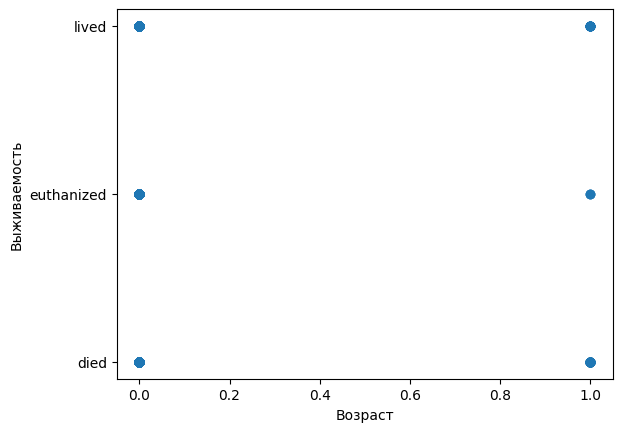

In [10]:
plt.scatter(data.age, data.outcome)
plt.xlabel("Возраст")
plt.ylabel("Выживаемость")
plt.show()

In [11]:
data['temp_of_extremities'].unique()

array(['cool', 'cold', 'normal', 'warm', 'None'], dtype=object)

In [12]:
none_count = data['temp_of_extremities'].value_counts()['None']

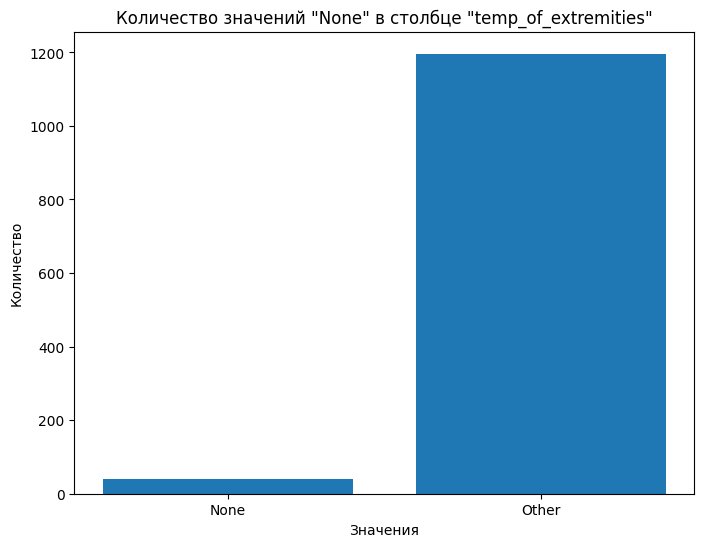

In [38]:
plt.figure(figsize=(8, 6))
plt.bar(['None', 'Other'], [none_count, len(data) - none_count])
plt.xlabel('Значения')
plt.ylabel('Количество')
plt.title('Количество значений "None" в столбце "temp_of_extremities"')
plt.show()

In [40]:
ydata_profiling.ProfileReport(data)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

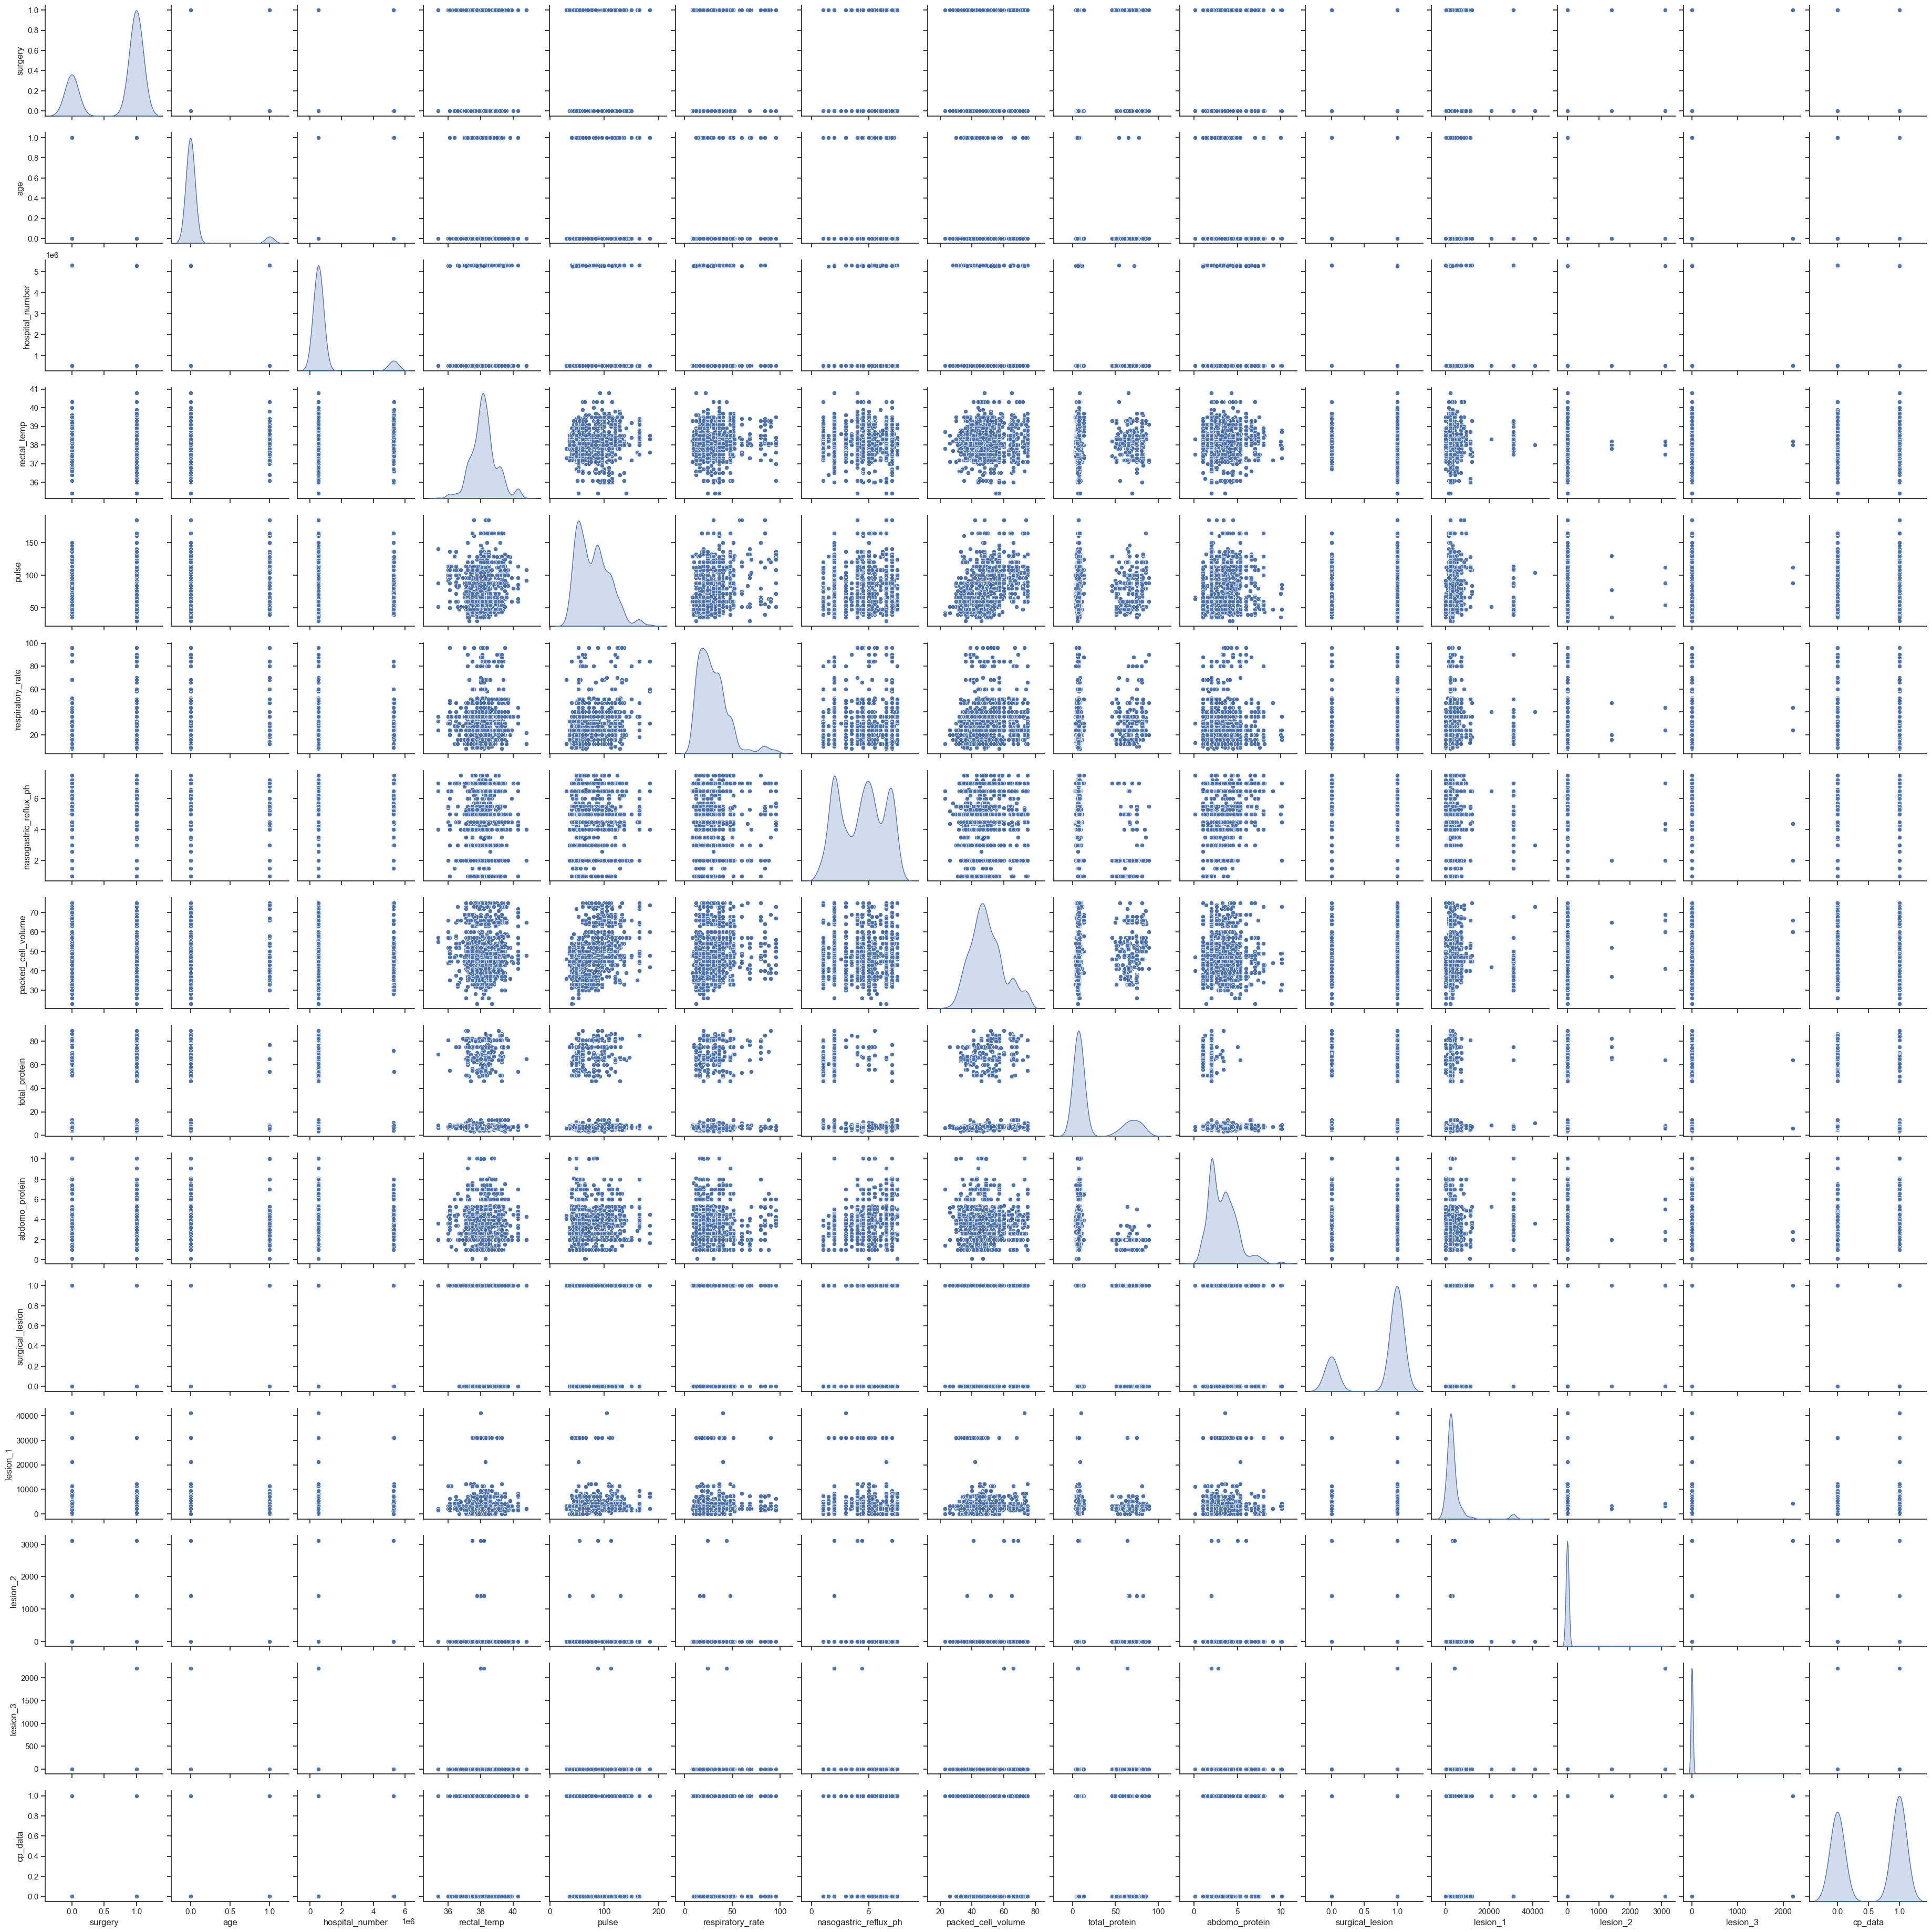

In [18]:
sns.set(style="ticks")
sns.pairplot(data, diag_kind="kde")
plt.show()

In [27]:
def visualize_classifier(classifier, X, y):
    # Определите границы графика
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    
    # Создайте сетку для графика
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
    
    # Получите предсказания классификатора для каждой точки на сетке
    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Постройте контурный график
    plt.contourf(xx, yy, Z, alpha=0.8)
    
    # Постройте точки данных
    plt.scatter(X[:, 0], X[:, 1], c=y, marker='o', s=25)
    
    plt.xlabel('Признак 1')
    plt.ylabel('Признак 2')
    plt.title('Визуализация классификации')
    plt.show()

In [29]:
X_encoded.columns = X_encoded.columns.astype(str)

X = X_encoded
y = df['outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

tree = DecisionTreeClassifier()
bag = BaggingClassifier(tree, n_estimators=100, max_samples=0.8, random_state=1)

bag.fit(X, y)

BaggingClassifier(estimator=DecisionTreeClassifier(), max_samples=0.8,
                  n_estimators=100, random_state=1)

In [33]:
y_train_pred = bag.predict(X_train)

y_test_pred = bag.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)

test_accuracy = accuracy_score(y_test, y_test_pred)

class_report = classification_report(y_test, y_test_pred)

print("Точность на обучающей выборке:", train_accuracy)
print("Точность на тестовой выборке:", test_accuracy)
print("Отчет по классификации:\n", class_report)

Точность на обучающей выборке: 1.0
Точность на тестовой выборке: 1.0
Отчет по классификации:
               precision    recall  f1-score   support

        died       1.00      1.00      1.00        75
  euthanized       1.00      1.00      1.00        56
       lived       1.00      1.00      1.00       116

    accuracy                           1.00       247
   macro avg       1.00      1.00      1.00       247
weighted avg       1.00      1.00      1.00       247



In [34]:
X_encoded

id  surgery  age  hospital_number  rectal_temp  pulse  \
0        0        1    0           530001         38.1  132.0   
1        1        1    0           533836         37.5   88.0   
2        2        1    0           529812         38.3  120.0   
3        3        1    0          5262541         37.1   72.0   
4        4        0    0          5299629         38.0   52.0   
...    ...      ...  ...              ...          ...    ...   
1230  1230        1    0           535246         38.5  129.0   
1231  1231        1    0           528570         37.5   60.0   
1232  1232        1    1           529685         37.5   84.0   
1233  1233        1    0           534784         38.1   70.0   
1234  1234        1    0           528548         38.1   54.0   

      respiratory_rate  nasogastric_reflux_ph  packed_cell_volume  \
0                 24.0                    6.5                57.0   
1                 12.0                    2.0                33.0   
2                 28.0                    3.5                37.0   
3                 30.0                    2.0                53.0   
4                 48.0                    7.0                47.0   
...                ...                    ...                 ...   
1230              48.0                    2.0                57.0   
1231              50.0                    3.0                35.0   
1232              40.0                    3.0                40.0   
1233              16.0                    2.0                58.0   
1234              36.0                    3.0                45.0   

      total_protein  ...   44   45   46   47   48   49   50   51   52   53  
0               8.5  ...  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  
1              64.0  ...  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0  
2               6.4  ...  1.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  1.0  
3               7.0  ...  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  
4               7.3  ...  0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  1.0  
...             ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  
1230           66.0  ...  1.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  1.0  
1231            6.4  ...  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  
1232            5.9  ...  0.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  
1233           74.0  ...  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  
1234            6.0  ...  0.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  

[1235 rows x 70 columns]